# Data Cleansing


In [ ]:
!pip install Sastrawi

     |████████████████████████████████| 215kB 8.9MB/s 


In [1]:
%cd /content/drive/MyDrive/Skripsi

[WinError 3] The system cannot find the path specified: '/content/drive/MyDrive/Skripsi'
C:\Users\Levi\Project Lephi\Skripsi


In [1]:
import pandas as pd
import re
import numpy as np
import string
import seaborn as sns

In [2]:
np.__version__

'1.19.5'

In [3]:
df = pd.read_excel('Dataset_Prakerja_4725.xlsx')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4725 entries, 0 to 4724
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         4725 non-null   int64         
 1   username   4721 non-null   object        
 2   date       4725 non-null   datetime64[ns]
 3   tweet      4725 non-null   object        
 4   sentiment  4725 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 184.7+ KB


In [6]:
df.sentiment.unique()

array(['negatif', 'netral', 'positif'], dtype=object)

In [7]:
# df = df[['tweet', 'sentiment']]

positif    2036
netral     1730
negatif     959
Name: sentiment, dtype: int64


C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sentiment', ylabel='count'>

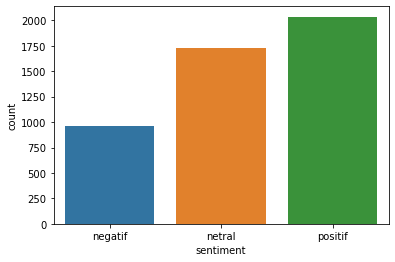

In [8]:
print(df.sentiment.value_counts())
sns.countplot(df.sentiment)

In [5]:
df = df.drop_duplicates()

In [6]:
tweet = df.tweet

In [7]:
emoji = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)

def processTweet(tweet):
    tweet = tweet.lower()
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',tweet)
    tweet = re.sub('@[^\s]+',' ',tweet)
    tweet = emoji.sub(r'', tweet)
    tweet = re.sub(r"\d+", " ", tweet)
    tweet = re.sub('[\s]+', ' ', tweet)
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    tweet = tweet.strip()
    return tweet

In [8]:
tweet_clean = []
for x in tweet :
  tweet_clean.append(processTweet(x))

In [9]:
df['cleansing_tweet'] = tweet_clean

Stemming

In [10]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [11]:
stem_tweet = []
for x in tweet_clean :
    katadasar = stemmer.stem(x)
    stem_tweet.append(katadasar)

In [12]:
df['stemming_tweet'] = stem_tweet

In [13]:
df.head()

,id,username,date,tweet,sentiment,cleansing_tweet,stemming_tweet
0,1316037510779162880,afin.AK,2020-10-13 15:26:08,RT @VIVAcoid: Chatib Basri: Kartu Prakerja Bis...,negatif,rt chatib basri kartu prakerja bisa jadi indik...,rt chatib basri kartu prakerja bisa jadi indik...
1,1316038516283908096,RIRI,2020-10-13 15:30:07,@poerbaa_ Kok kartu prakerja?,netral,kok kartu prakerja,kok kartu prakerja
2,1316038597074543104,Anies *Rizal_Ramli * SaidDidu ❄️,2020-10-13 15:30:27,@geloraco BBM Meroket\nTarif Listrik Meroket\n...,netral,bbm meroket tarif listrik meroket garuda rugi ...,bbm roket tarif listrik roket garuda rugi krak...
3,1316038906739977984,Adhiyaksa,2020-10-13 15:31:40,@ReceinAja Untung bukan insentif prakerja.,netral,untung bukan insentif prakerja,untung bukan insentif prakerja
4,1316040551930588928,a new name,2020-10-13 15:38:13,yatuhan trimakasi rejeki hari ini 😇🥰 insentif ...,positif,yatuhan trimakasi rejeki hari ini insentif pra...,yatuhan trimakasi rejeki hari ini insentif pra...


Tokenizing

In [14]:
from nltk.tokenize import word_tokenize
token_tweet = []
for x in stem_tweet :
  token_tweet.append(word_tokenize(x))

In [15]:
df['token_tweet'] = token_tweet

Slang Word

In [20]:
slang_word = open("combined_slang_words.txt","r+").read()
dict_slang = eval(slang_word)

In [21]:
dict_slang

{'@': 'di',
 'abis': 'habis',
 'ad': 'ada',
 'adlh': 'adalah',
 'afaik': 'as far as i know',
 'ahaha': 'haha',
 'aj': 'saja',
 'ajep-ajep': 'dunia gemerlap',
 'ak': 'saya',
 'akika': 'aku',
 'akkoh': 'aku',
 'akuwh': 'aku',
 'alay': 'norak',
 'alow': 'halo',
 'ambilin': 'ambilkan',
 'ancur': 'hancur',
 'anjrit': 'anjing',
 'anter': 'antar',
 'ap2': 'apa-apa',
 'apasih': 'apa sih',
 'apes': 'sial',
 'aps': 'apa',
 'aq': 'saya',
 'aquwh': 'aku',
 'asbun': 'asal bunyi',
 'aseekk': 'asyik',
 'asekk': 'asyik',
 'asem': 'asam',
 'aspal': 'asli tetapi palsu',
 'astul': 'asal tulis',
 'ato': 'atau',
 'au ah': 'tidak mau tahu',
 'awak': 'saya',
 'ay': 'sayang',
 'ayank': 'sayang',
 'b4': 'sebelum',
 'bakalan': 'akan',
 'bandes': 'bantuan desa',
 'bangedh': 'banget',
 'banpol': 'bantuan polisi',
 'banpur': 'bantuan tempur',
 'basbang': 'basi',
 'bcanda': 'bercanda',
 'bdg': 'bandung',
 'begajulan': 'nakal',
 'beliin': 'belikan',
 'bencong': 'banci',
 'bentar': 'sebentar',
 'ber3': 'bertiga',
 'b

In [17]:
# slang_df = pd.DataFrame(dict_slang.items(), columns=['Old', 'New'])
slang_df = pd.read_excel('slang_word.xlsx')
slang_df.head()

,Old,New
0,@,di
1,abis,habis
2,ad,ada
3,adlh,adalah
4,afaik,as far as i know


In [18]:
slang_df['Old'] = slang_df['Old'].apply(lambda x: x.strip())
slang_df['New'] = slang_df['New'].apply(lambda x: x.strip())

In [19]:
# transform into key value in a dict
slang_dict = {}
for i, row in slang_df.iterrows():
  slang_dict.update({row['Old']: row['New']})

In [20]:
def removeSlang(data):
  for i, word in enumerate(data):
    try:
      data[i] = slang_dict[word]
    except KeyError:
      pass
  return data

In [21]:
no_slang_tweet = []
for x in token_tweet :
    word = removeSlang(x)
    no_slang_tweet.append(word)

In [22]:
df['no_slang_tweet'] = no_slang_tweet
df.head()

,id,username,date,tweet,sentiment,cleansing_tweet,stemming_tweet,token_tweet,no_slang_tweet
0,1316037510779162880,afin.AK,2020-10-13 15:26:08,RT @VIVAcoid: Chatib Basri: Kartu Prakerja Bis...,negatif,rt chatib basri kartu prakerja bisa jadi indik...,rt chatib basri kartu prakerja bisa jadi indik...,"[rt, chatib, basri, kartu, prakerja, bisa, jad...","[rt, chatib, basri, kartu, prakerja, bisa, jad..."
1,1316038516283908096,RIRI,2020-10-13 15:30:07,@poerbaa_ Kok kartu prakerja?,netral,kok kartu prakerja,kok kartu prakerja,"[kok, kartu, prakerja]","[kok, kartu, prakerja]"
2,1316038597074543104,Anies *Rizal_Ramli * SaidDidu ❄️,2020-10-13 15:30:27,@geloraco BBM Meroket\nTarif Listrik Meroket\n...,netral,bbm meroket tarif listrik meroket garuda rugi ...,bbm roket tarif listrik roket garuda rugi krak...,"[bbm, roket, tarif, listrik, roket, garuda, ru...","[bbm, roket, tarif, listrik, roket, garuda, ru..."
3,1316038906739977984,Adhiyaksa,2020-10-13 15:31:40,@ReceinAja Untung bukan insentif prakerja.,netral,untung bukan insentif prakerja,untung bukan insentif prakerja,"[untung, bukan, insentif, prakerja]","[untung, bukan, insentif, prakerja]"
4,1316040551930588928,a new name,2020-10-13 15:38:13,yatuhan trimakasi rejeki hari ini 😇🥰 insentif ...,positif,yatuhan trimakasi rejeki hari ini insentif pra...,yatuhan trimakasi rejeki hari ini insentif pra...,"[tuhan, terimakasih, rezeki, hari, ini, insent...","[tuhan, terimakasih, rezeki, hari, ini, insent..."


Menghilangkan Stopword

In [23]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
import string

stop = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Levi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Levi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
# stopWords = []

# def replaceTwoOrMore(s):
#     pattern = re.compile(r"(.)\1{1,}", re.DOTALL)
    
#     return pattern.sub(r"\1\1", s)

def getStopWordList(stopWordList):
    stopWords = stop.copy()
    stopWords.append('AT_USER')
    stopWords.append('URL')
    stopWords.extend(stopWordList)
    return stopWords

# def getFeatureVector(tweet):
#     featureVector = []
#     words = tweet.split()
#     for w in words:
#         w = replaceTwoOrMore(w)
#         w = w.strip('\'"?,.')
#         val = re.search(r"^[a-zA-Z][a-zA-Z0-9]*$", w)
#         if(w in stopWords or val):
#             continue
#         else:
#             featureVector.append(w.lower())
#     return featureVector

In [37]:
stopWords = getStopWordList(['yg','tdk','gak','ga','blm','tak','ini','utk','di','itu','gua','jd','gue','tp','rt'])
# token_tweet = []
# for x in stem_tweet :
#     featureVector = getFeatureVector(x)
#     token_tweet.append(featureVector)

In [38]:
stopWords.remove('tidak')
stopWords.remove('tak')
stopWords.remove('bukan')
stopWords.remove('enggak')
stopWords.remove('jangan')
stopWords.remove('lain')
# stopWords.remove('kagak')

In [39]:
filtered_sentence = []
for word_tokens in no_slang_tweet :
  filtered_sentence.append([w for w in word_tokens if not w in stopWords])

In [40]:
df['no_stopword_tweet'] = filtered_sentence

In [41]:
# df.to_csv('Dataset_Prakerja_4725.csv',index=False)
# df.to_excel('Dataset_Prakerja_4725.xlsx',index=False)

In [42]:
df['no_stopword_tweet'].head(10)

0    [chatib, basri, kartu, prakerja, indikator, or...
1                                    [kartu, prakerja]
2    [bbm, roket, tarif, listrik, roket, garuda, ru...
3                  [untung, bukan, insentif, prakerja]
4    [tuhan, terimakasih, rezeki, insentif, prakerj...
5    [soksok, an, anti, presiden, anti, perintah, s...
6    [soksok, an, anti, presiden, anti, perintah, s...
7    [cak, daftar, prakerja, gini, tuh, maksud, iya...
8    [modal, nomor, ktp, data, bantu, perintah, rp,...
9                   [tutup, gelombang, prakerja, nder]
Name: no_stopword_tweet, dtype: object

# Visualisasi Data

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import ast

In [44]:
df.sentiment.unique()

array(['negatif', 'netral', 'positif'], dtype=object)

In [45]:
df.no_stopword_tweet[1]

['kartu', 'prakerja']

In [46]:
df.groupby('sentiment').count()

,id,username,date,tweet,cleansing_tweet,stemming_tweet,token_tweet,no_slang_tweet,no_stopword_tweet
sentiment,,,,,,,,,
negatif,959,959,959,959,959,959,959,959,959
netral,1730,1729,1730,1730,1730,1730,1730,1730,1730
positif,2036,2033,2036,2036,2036,2036,2036,2036,2036


In [47]:
neg_tweets = []
pos_tweets = []
net_tweets = []

for  index, t in df.iterrows() :
  text = t.no_stopword_tweet
  if t.sentiment == 'positif' :
    pos_tweets = pos_tweets + text
  elif t.sentiment == 'negatif' :
    neg_tweets = neg_tweets + text
  else :
    net_tweets = net_tweets + text


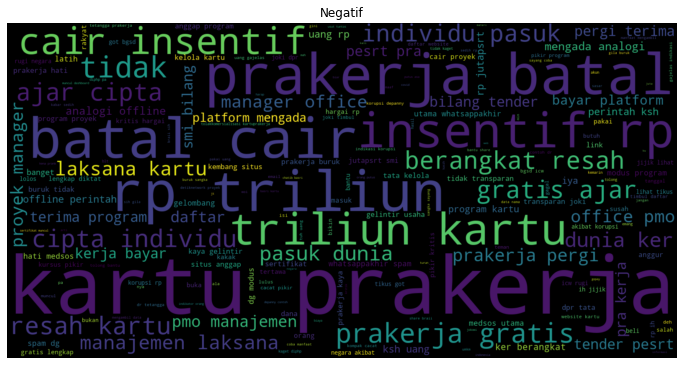

In [48]:

wordcloud = WordCloud(width=1600, height=800,max_font_size=400).generate(' '.join([str(elem) for elem in neg_tweets]))
plt.figure(figsize=(12,10))
plt.title('Negatif')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

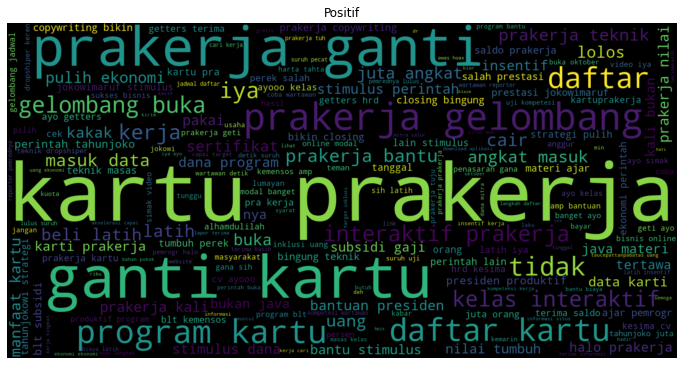

In [49]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=400).generate(' '.join([str(elem) for elem in pos_tweets]))
plt.figure(figsize=(12,10))
plt.title('Positif')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

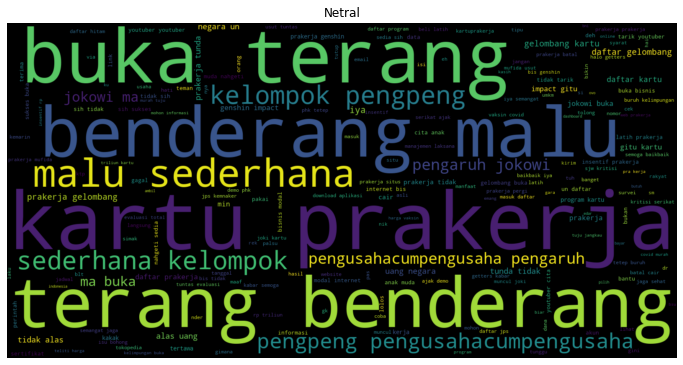

In [50]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=400).generate(' '.join([str(elem) for elem in net_tweets]))
plt.figure(figsize=(12,10))
plt.title('Netral')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [51]:
data_list = df.drop(['username'],axis=1)
# data_list = df

In [52]:
data_list.dropna()

,id,date,tweet,sentiment,cleansing_tweet,stemming_tweet,token_tweet,no_slang_tweet,no_stopword_tweet
0,1316037510779162880,2020-10-13 15:26:08,RT @VIVAcoid: Chatib Basri: Kartu Prakerja Bis...,negatif,rt chatib basri kartu prakerja bisa jadi indik...,rt chatib basri kartu prakerja bisa jadi indik...,"[rt, chatib, basri, kartu, prakerja, bisa, jad...","[rt, chatib, basri, kartu, prakerja, bisa, jad...","[chatib, basri, kartu, prakerja, indikator, or..."
1,1316038516283908096,2020-10-13 15:30:07,@poerbaa_ Kok kartu prakerja?,netral,kok kartu prakerja,kok kartu prakerja,"[kok, kartu, prakerja]","[kok, kartu, prakerja]","[kartu, prakerja]"
2,1316038597074543104,2020-10-13 15:30:27,@geloraco BBM Meroket\nTarif Listrik Meroket\n...,netral,bbm meroket tarif listrik meroket garuda rugi ...,bbm roket tarif listrik roket garuda rugi krak...,"[bbm, roket, tarif, listrik, roket, garuda, ru...","[bbm, roket, tarif, listrik, roket, garuda, ru...","[bbm, roket, tarif, listrik, roket, garuda, ru..."
3,1316038906739977984,2020-10-13 15:31:40,@ReceinAja Untung bukan insentif prakerja.,netral,untung bukan insentif prakerja,untung bukan insentif prakerja,"[untung, bukan, insentif, prakerja]","[untung, bukan, insentif, prakerja]","[untung, bukan, insentif, prakerja]"
4,1316040551930588928,2020-10-13 15:38:13,yatuhan trimakasi rejeki hari ini 😇🥰 insentif ...,positif,yatuhan trimakasi rejeki hari ini insentif pra...,yatuhan trimakasi rejeki hari ini insentif pra...,"[tuhan, terimakasih, rezeki, hari, ini, insent...","[tuhan, terimakasih, rezeki, hari, ini, insent...","[tuhan, terimakasih, rezeki, insentif, prakerj..."
...,...,...,...,...,...,...,...,...,...
4720,1265333193374220032,2020-05-26 17:25:16,RT @BamsBulaksumur: Lagi2 pembuktian bhw pela...,positif,rt lagi pembuktian bhw pelatihan kartu prakerj...,rt lagi bukti bhw latih kartu prakerja itu tek...,"[rt, lagi, bukti, bahwa, latih, kartu, prakerj...","[rt, lagi, bukti, bahwa, latih, kartu, prakerj...","[bukti, latih, kartu, prakerja, tekan, kualita..."
4721,1265329527590249984,2020-05-26 17:10:42,RT @_garuda501: Prakerja bisa jadi the bigges...,negatif,rt prakerja bisa jadi the biggest prank virtua...,rt prakerja bisa jadi the biggest prank virtua...,"[rt, prakerja, bisa, jadi, the, biggest, prank...","[rt, prakerja, bisa, jadi, the, biggest, prank...","[prakerja, the, biggest, prank, virtual, uang,..."
4722,1265328279117939968,2020-05-26 17:05:45,@BamsBulaksumur Jelek atau bagus gak nya suat...,positif,jelek atau bagus gak nya suatu pelatihan pasti...,jelek atau bagus gak nya suatu latih pasti gak...,"[jelek, atau, bagus, tidak, nya, suatu, latih,...","[jelek, atau, bagus, tidak, nya, suatu, latih,...","[jelek, bagus, tidak, nya, latih, tidak, orang..."
4723,1265327011418909952,2020-05-26 17:00:42,PRAKERJA SUDAH DI BUKA #prakerja #kartupraker...,positif,prakerja sudah di buka prakerja kartuprakerja ...,prakerja sudah di buka prakerja kartuprakerja ...,"[prakerja, sudah, di, buka, prakerja, kartupra...","[prakerja, sudah, di, buka, prakerja, kartupra...","[prakerja, buka, prakerja, kartuprakerja, prak..."


In [53]:
data_string = []
token_string= []
for x in df.no_stopword_tweet :
  kata = x
  token_string.append(kata)
  data_string.append(' '.join([str(elem) for elem in kata]))

In [54]:
df['final_tweet'] = data_string

In [56]:
df = df.drop(['username'],axis = 1)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4725 entries, 0 to 4724
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 4725 non-null   int64         
 1   date               4725 non-null   datetime64[ns]
 2   tweet              4725 non-null   object        
 3   sentiment          4725 non-null   object        
 4   cleansing_tweet    4725 non-null   object        
 5   stemming_tweet     4725 non-null   object        
 6   token_tweet        4725 non-null   object        
 7   no_slang_tweet     4725 non-null   object        
 8   no_stopword_tweet  4725 non-null   object        
 9   final_tweet        4725 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 535.1+ KB


In [60]:
final_data = df[['final_tweet','sentiment']]

In [61]:
final_data

,final_tweet,sentiment
0,chatib basri kartu prakerja indikator orang pu...,negatif
1,kartu prakerja,netral
2,bbm roket tarif listrik roket garuda rugi krak...,netral
3,untung bukan insentif prakerja,netral
4,tuhan terimakasih rezeki insentif prakerja tah...,positif
...,...,...
4720,bukti latih kartu prakerja tekan kualitas buka...,positif
4721,prakerja the biggest prank virtual uang arti n...,negatif
4722,jelek bagus tidak nya latih tidak orang orang ...,positif
4723,prakerja buka prakerja kartuprakerja prakerja,positif


In [62]:
final_data.to_excel('Dataset_Final.xlsx',index=False)

# Testing

In [63]:
import pandas as pd

In [64]:
df_test = pd.read_excel('Evaluasi v2.xlsx')

In [65]:
df_test

,id,name,create_at,text
0,1383057367667998976,DetikFinance,2021-04-16 13:59:07,Program Kartu Prakerja dinilai banyak pihak pe...
1,1383053816178807040,GTV Indonesia News,2021-04-16 13:45:00,"29 Ribu Peserta Kartu Prakerja 'Dipecat', BLT ..."
2,1383052986826427904,My Son... God with us,2021-04-16 13:41:42,@budimandjatmiko @Fari_Siregar Physing bisa di...
3,1383052557837337088,Lintas_MNCTV,2021-04-16 13:40:00,"29 Ribu Peserta Kartu Prakerja 'Dipecat', BLT ..."
4,1383051579343790080,VIVAcoid,2021-04-16 13:36:07,Kartu Prakerja Dinilai Jawab Kebutuhan Pekerja...
...,...,...,...,...
146,1387628126008528896,Rudy,2021-04-29 04:41:40,@Hanaadulsett @prakerja_id Sdh ikut pelatihan ...
147,1387628112075051008,Ayo Cirebon,2021-04-29 04:41:37,https://t.co/3Y2F14kWJZ #Prakerja
148,1387627994160665088,Mafia Hukum,2021-04-29 04:41:09,@YourEgoKiller @Risolmayooo_ @CNNIndonesia Yan...
149,1387621926370091008,ayojakarta,2021-04-29 04:17:02,Kartu Prakerja: Hari Terakhir untuk Dapat Inse...


In [66]:
# df_tweet = df_test.drop(['id','name','create_at'],axis=1).drop_duplicates()
df_tweet = df_test.drop(['id','name','create_at'],axis=1).drop_duplicates()

In [67]:
tweet = df_tweet.text

In [68]:
def cleansing(text):
    return [processTweet(x) for x in text]

def stemming(text):
    return [stemmer.stem(x) for x in text]

def tokenizing(text):
    return [word_tokenize(x) for x in text]

def remove_slangword(text):
    return [removeSlang(x) for x in text]

def remove_stopword(text):
    return [[w for w in x if not w in stopWords] for x in text]

def final_sentence(text):
    return [' '.join([str(elem) for elem in x]) for x in text]

In [69]:
clean = cleansing(tweet)
stem = stemming(clean)
token = tokenizing(stem)
remove_sl = remove_slangword(token)
remove_st = remove_stopword(remove_sl)
ready = final_sentence(remove_st)

In [70]:
# df_tweet['cleansing'] = clean
# df_tweet['steming'] = stem
# df_tweet['token'] = token
# df_tweet['slangword'] = remove_sl
# df_tweet['stopword'] = remove_st
df_tweet['final'] = ready

df_tweet.to_excel('Hasil_Preprocessing_Test.xlsx',index=False)